# Stationarity in Time Series Data:
Stationarity is a fundamental concept in time series analysis. A time series is said to be stationary if its statistical properties—such as mean, variance, and covariance—do not change over time. 
- This is important because many time series models, including ARIMA, require the data to be stationary for reliable predictions.

# 📌 Types of Stationarity:
**1.Strict Stationarity:**
- A time series is strictly stationary if its statistical properties (mean, variance, autocovariance) are identical across all time periods.
- *For example*, if you take any subset of the series and apply statistical tests, they should give the same results, regardless of the time period.
- Strict stationarity is quite rare in real-world time series data.
  
**2.Weak (or Second-Order) Stationarity:**
- A time series is weakly stationary if the following conditions hold:
- Constant Mean: The mean of the series remains the same over time.
- Constant Variance: The variance of the series remains constant over time.
- Constant Covariance: The covariance between two observations only depends on the distance (lag) between them, not on the actual time at which they occur.
This type of stationarity is commonly assumed in many time series models.

# 📌 Why Stationarity Matters:
- **Modeling:** Many forecasting models, such as ARIMA, rely on the assumption that the data is stationary. If the data is non-stationary, the model might not perform well.
- **Prediction:** Stationary data has no trend or seasonality, making it easier to model and forecast future values since its behavior remains constant.
- **Simplifies Analysis:** Stationary data simplifies the analysis by ensuring that the relationships between variables do not change over time.


# Tests for Stationarity in Time Series Analysis
## 📌 Methods to Test for Stationarity
### 1. Visual Inspection
One of the simplest ways to check for stationarity is by plotting the time series. A stationary time series will have a constant mean and variance over time.

*Steps:*
- Plot the original time series.
- Observe trends, seasonality, and variance changes.

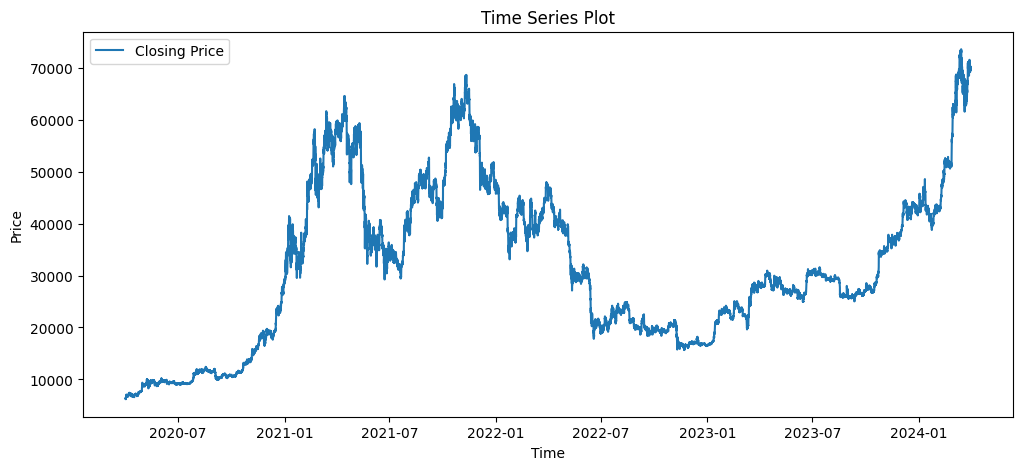

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the time series data 
stock_data = pd.read_csv("../Data/BTCUSDT_Hourly_FY2020-2024.csv", parse_dates=["Open time"], index_col="Open time")

# Plot the time series data
plt.figure(figsize=(12, 5))
plt.plot(stock_data['Close'], label="Closing Price")
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


##  Interpretation:
- the series shows a clear trend (upward/downward), it is non-stationary.
- the variance is increasing over time, it is non-stationary.

## 2️. Rolling Statistics Test (Moving Average and Standard Deviation)
This method calculates the rolling mean and rolling standard deviation over time to check if they remain constant.

*Steps:*

- Compute the rolling mean and rolling standard deviation.
- Plot them alongside the original time series.

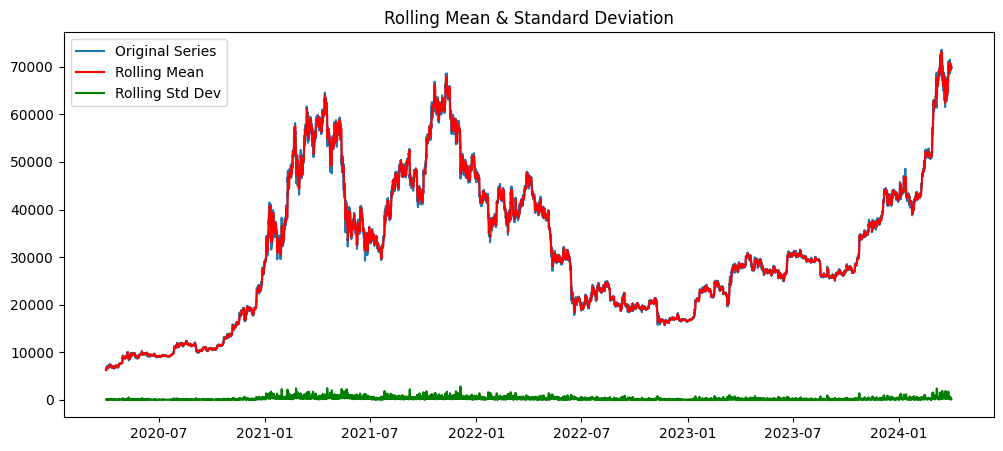

In [5]:
# Compute rolling statistics
rolling_mean = stock_data['Close'].rolling(window=12).mean()
rolling_std = stock_data['Close'].rolling(window=12).std()

# Plot original series with rolling statistics
plt.figure(figsize=(12, 5))
plt.plot(stock_data['Close'], label="Original Series")
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_std, color="green", label="Rolling Std Dev")
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()


### Observations:
- The rolling mean (red line) follows the general trend of BTC price, indicating that the mean is not constant over time.
- The rolling standard deviation (green line) varies significantly, meaning the volatility is changing over time.
- This suggests that the series is likely non-stationary, as both the mean and variance are not constant over time.

## 3. Augmented Dickey-Fuller (ADF) Test
The ADF test is a statistical test that determines whether a time series is stationary. It checks if the time series has a unit root, which indicates non-stationarity.

### 📌 Hypothesis for ADF Test:

- Null Hypothesis (H₀): The series has a unit root (i.e., it is non-stationary).
- Alternative Hypothesis (H₁): The series is stationary.

*Steps:*
- Perform the ADF test.
    - If the p-value < 0.05, reject H₀ → The series is stationary.
    - If the p-value ≥ 0.05, fail to reject H₀ → The series is non-stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(stock_data['Close'])

# Print test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Interpretation
if result[1] < 0.05:
    print("The time series is stationary (reject H₀).")
else:
    print("The time series is non-stationary (fail to reject H₀).")


ADF Statistic: -0.839500933953523
p-value: 0.8072427887424705
Critical Values: {'1%': np.float64(-3.430537037899186), '5%': np.float64(-2.861622666126849), '10%': np.float64(-2.5668140005816524)}
The time series is non-stationary (fail to reject H₀).


### Interpretation:

- If p-value < 0.05, the series is stationary.
- If p-value ≥ 0.05, the series is non-stationary.

# 4. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The KPSS test is another statistical test for stationarity. Unlike ADF, it has a reverse hypothesis:

### 📌 Hypothesis for KPSS Test:

- Null Hypothesis (H₀): The series is stationary.
- Alternative Hypothesis (H₁): The series is non-stationary.

In [7]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
kpss_stat, p_value, _, critical_values = kpss(stock_data['Close'], nlags="auto")

# Print test results
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpretation
if p_value < 0.05:
    print("The time series is non-stationary (reject H₀).")
else:
    print("The time series is stationary (fail to reject H₀).")


KPSS Statistic: 3.81469934597652
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is non-stationary (reject H₀).


C:\Users\india\AppData\Local\Temp\ipykernel_18004\4041102239.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, _, critical_values = kpss(stock_data['Close'], nlags="auto")


### Interpretation:

- If p-value < 0.05, the series is non-stationary.
- If p-value ≥ 0.05, the series is stationary.
